# Part 2: Praproses dan Pelabelan Data Review Tokopedia

Notebook ini berisi kode untuk melakukan praproses dan pelabelan data review Tokopedia yang telah di-scraping.

## Import Library yang Diperlukan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

## Download Paket NLTK yang Diperlukan

In [1]:
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')

NameError: name 'nltk' is not defined

## Memuat Data yang Telah di-Scraping

In [ ]:
# Memuat data dari file CSV
df_reviews = pd.read_csv('tokopedia_reviews_raw.csv')

# Melihat 5 data pertama
df_reviews.head()

,content,score,at
0,pesanan sameday lama dan lambat pick up nya,1,2025-03-25 17:54:31
1,"apk nya ge bener banget, sy komplain barang, m...",1,2025-03-25 17:51:38
2,terimakasih sdh hadir u pilihan masyarakat kita,5,2025-03-25 17:44:01
3,TOLONG TOKOPEDIA BATALKAN INTERGRASI TOKOPEDIA...,1,2025-03-25 17:42:10
4,"emang banyak banget minusnya ini aplikasi, pel...",1,2025-03-25 16:59:16


## Pelabelan Data Berdasarkan Score

In [ ]:
def label_sentiment(score):
    if score >= 4:  # Rating 4-5 sebagai sentimen positif
        return 'positive'
    elif score <= 2:  # Rating 1-2 sebagai sentimen negatif
        return 'negative'
    else:  # Rating 3 sebagai sentimen netral
        return 'neutral'

# Aplikasikan fungsi pelabelan ke kolom 'score'
df_reviews['sentiment'] = df_reviews['score'].apply(label_sentiment)

# Melihat contoh data setelah pelabelan
df_reviews[['content', 'score', 'sentiment']].head()

,content,score,sentiment
0,pesanan sameday lama dan lambat pick up nya,1,negative
1,"apk nya ge bener banget, sy komplain barang, m...",1,negative
2,terimakasih sdh hadir u pilihan masyarakat kita,5,positive
3,TOLONG TOKOPEDIA BATALKAN INTERGRASI TOKOPEDIA...,1,negative
4,"emang banyak banget minusnya ini aplikasi, pel...",1,negative


## Visualisasi Distribusi Sentimen

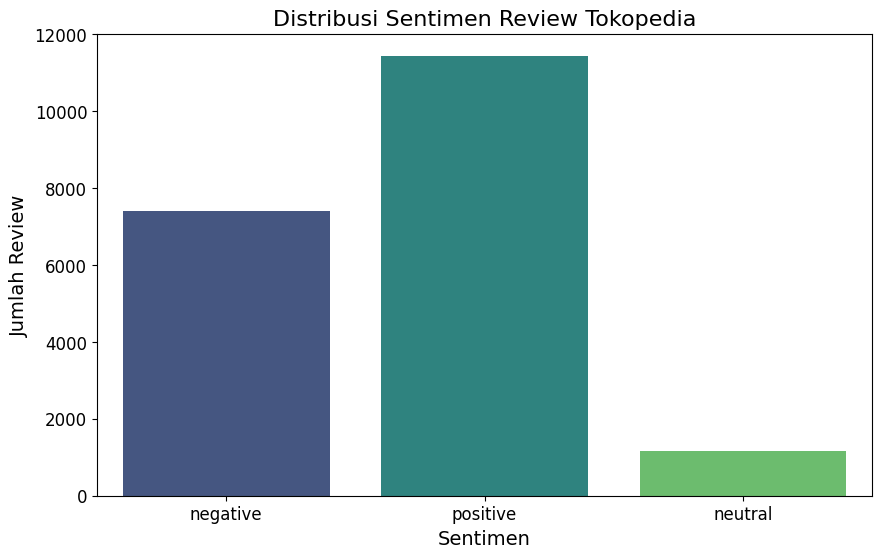

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df_reviews, palette='viridis')
plt.title('Distribusi Sentimen Review Tokopedia', fontsize=16)
plt.xlabel('Sentimen', fontsize=14)
plt.ylabel('Jumlah Review', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# Persentase sentimen
sentiment_counts = df_reviews['sentiment'].value_counts(normalize=True) * 100
print("Persentase Sentimen:")
for sentiment, percentage in sentiment_counts.items():
    print(f"{sentiment}: {percentage:.2f}%")

Persentase Sentimen:
positive: 57.21%
negative: 37.01%
neutral: 5.78%


## Praproses Teks Review

In [ ]:
def preprocess_text(text):
    # Cek jika text adalah string
    if not isinstance(text, str):
        return ''
    
    # Konversi ke huruf kecil
    text = text.lower()
    
    # Hapus URL
    text = re.sub(r'http\S+', '', text)
    
    # Hapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Hapus angka
    text = re.sub(r'\d+', '', text)
    
    # Tokenisasi
    tokens = word_tokenize(text)
    
    # Filter stopwords
    stop_words = set(stopwords.words('indonesian'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Gabung kembali
    return ' '.join(tokens)

In [ ]:
# Terapkan praproses pada kolom 'content'
df_reviews['processed_content'] = df_reviews['content'].apply(preprocess_text)

# Melihat contoh data setelah praproses
df_reviews[['content', 'processed_content', 'sentiment']].head()

,content,processed_content,sentiment
0,pesanan sameday lama dan lambat pick up nya,pesanan sameday lambat pick up nya,negative
1,"apk nya ge bener banget, sy komplain barang, m...",apk nya ge bener banget sy komplain barang dib...,negative
2,terimakasih sdh hadir u pilihan masyarakat kita,terimakasih sdh hadir u pilihan masyarakat,positive
3,TOLONG TOKOPEDIA BATALKAN INTERGRASI TOKOPEDIA...,tolong tokopedia batalkan intergrasi tokopedia...,negative
4,"emang banyak banget minusnya ini aplikasi, pel...",emang banget minusnya aplikasi pelayanan cs ng...,negative


## Bersihkan Data Kosong

In [ ]:
# Cek jumlah data sebelum pembersihan
print(f"Jumlah data sebelum pembersihan: {len(df_reviews)}")

# Hapus baris dengan konten kosong setelah praproses
df_reviews = df_reviews[df_reviews['processed_content'] != '']

# Cek jumlah data setelah pembersihan
print(f"Jumlah data setelah pembersihan: {len(df_reviews)}")

Jumlah data sebelum pembersihan: 19724
Jumlah data setelah pembersihan: 19724


## Visualisasi Kata-kata Umum dengan WordCloud

In [ ]:
# Buat dataset untuk binary sentiment (positif dan negatif saja)
df_binary = df_reviews[df_reviews['sentiment'] != 'neutral']

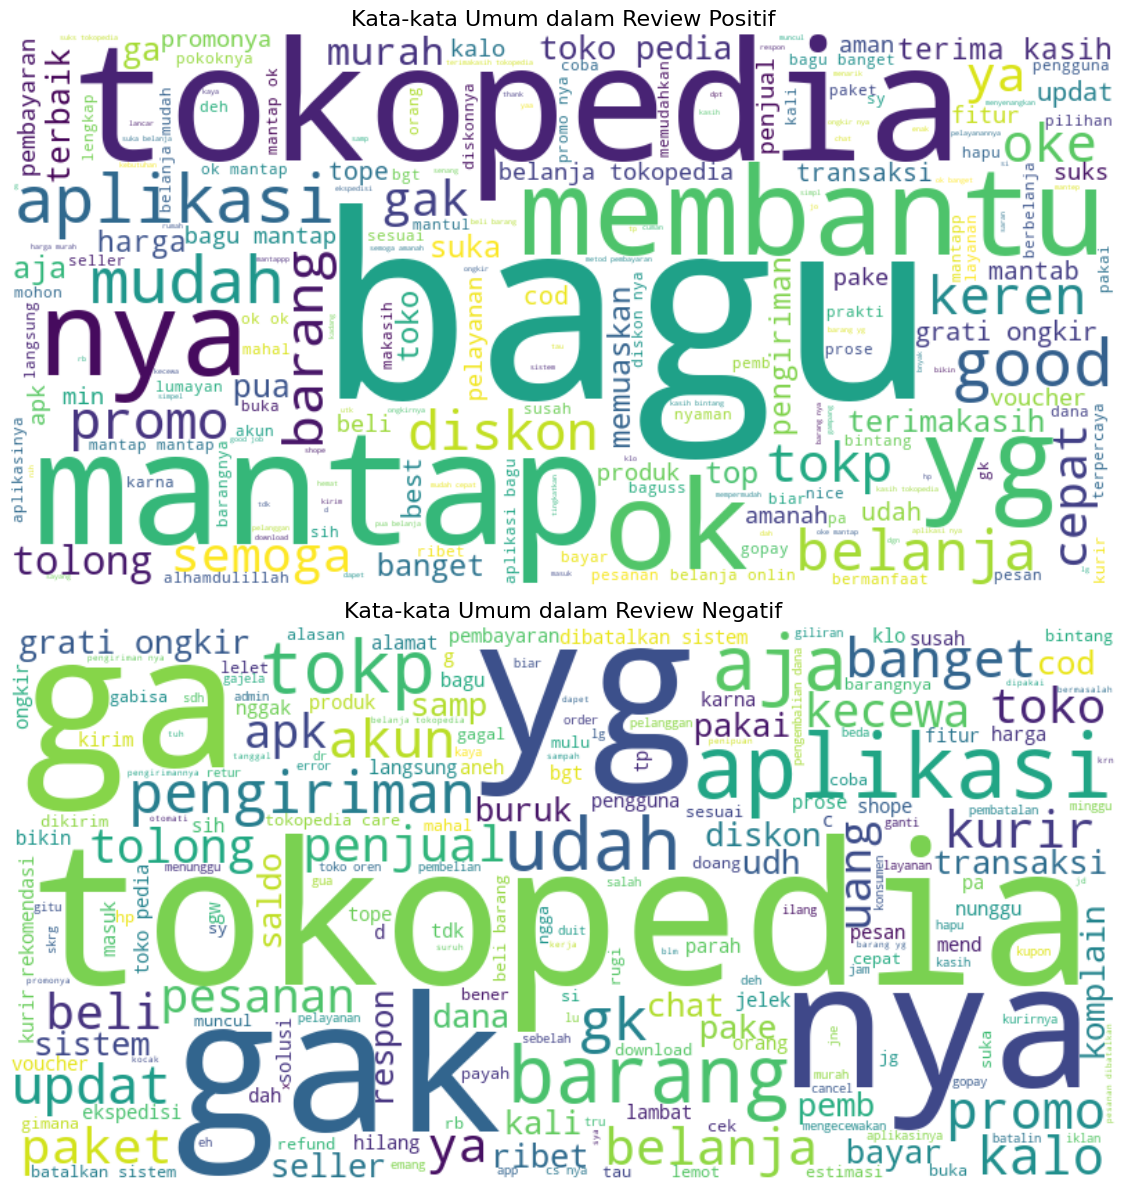

In [ ]:
plt.figure(figsize=(12, 12))

# Word cloud untuk sentimen positif
positive_text = ' '.join(df_binary[df_binary['sentiment'] == 'positive']['processed_content'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.subplot(2, 1, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Kata-kata Umum dalam Review Positif', fontsize=16)

# Word cloud untuk sentimen negatif
negative_text = ' '.join(df_binary[df_binary['sentiment'] == 'negative']['processed_content'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.subplot(2, 1, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Kata-kata Umum dalam Review Negatif', fontsize=16)

plt.tight_layout()
plt.show()

## Fitur Tambahan: Panjang Review

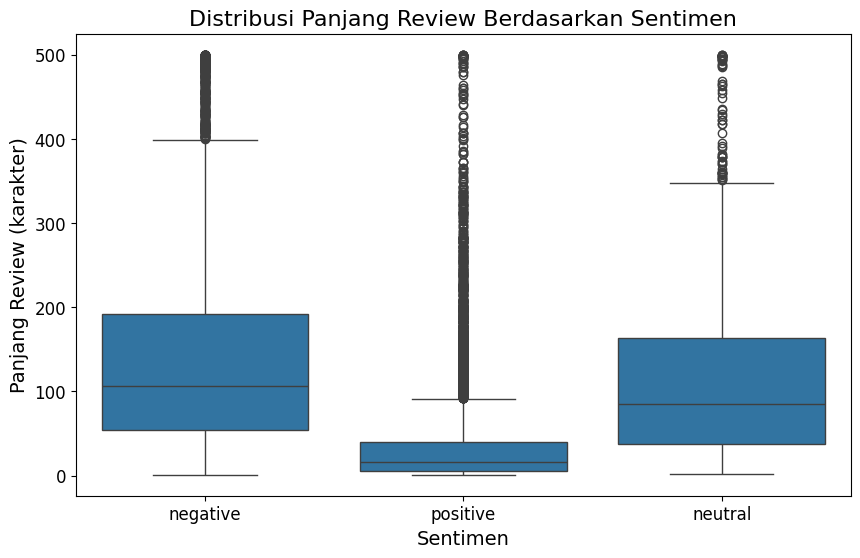

In [ ]:
# Tambahkan fitur panjang review
df_reviews['review_length'] = df_reviews['content'].apply(len)

# Melihat distribusi panjang review berdasarkan sentimen
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='review_length', data=df_reviews)
plt.title('Distribusi Panjang Review Berdasarkan Sentimen', fontsize=16)
plt.xlabel('Sentimen', fontsize=14)
plt.ylabel('Panjang Review (karakter)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Simpan Data yang Telah Diproses

In [ ]:
# Simpan data yang telah diproses
df_reviews.to_csv('tokopedia_reviews_processed.csv', index=False)
print("Data berhasil disimpan ke 'tokopedia_reviews_processed.csv'")

# Simpan data binary sentiment
df_binary.to_csv('tokopedia_reviews_binary.csv', index=False)
print("Data binary sentiment berhasil disimpan ke 'tokopedia_reviews_binary.csv'")

Data berhasil disimpan ke 'tokopedia_reviews_processed.csv'
Data binary sentiment berhasil disimpan ke 'tokopedia_reviews_binary.csv'


In [23]:
# Import Library yang Diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import warnings
import nltk
import pickle

warnings.filterwarnings('ignore')

In [24]:
# Download resource untuk VADER
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Novandra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [25]:
# Memuat Data yang Telah Diproses
df = pd.read_csv('tokopedia_reviews_binary.csv')
print(df.head())


                                             content  score  \
0        pesanan sameday lama dan lambat pick up nya      1   
1  apk nya ge bener banget, sy komplain barang, m...      1   
2    terimakasih sdh hadir u pilihan masyarakat kita      5   
3  TOLONG TOKOPEDIA BATALKAN INTERGRASI TOKOPEDIA...      1   
4  emang banyak banget minusnya ini aplikasi, pel...      1   

                    at sentiment  \
0  2025-03-25 17:54:31  negative   
1  2025-03-25 17:51:38  negative   
2  2025-03-25 17:44:01  positive   
3  2025-03-25 17:42:10  negative   
4  2025-03-25 16:59:16  negative   

                                   processed_content  
0                 pesanan sameday lambat pick up nya  
1  apk nya ge bener banget sy komplain barang dib...  
2         terimakasih sdh hadir u pilihan masyarakat  
3  tolong tokopedia batalkan intergrasi tokopedia...  
4  emang banget minusnya aplikasi pelayanan cs ng...  


In [26]:
# Oversampling dengan SMOTE
X = df['processed_content']
y = df['sentiment']
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [27]:
# Encoding label ke format numerik
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [29]:
# Pelatihan Model Machine Learning
# 1. Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train_encoded)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Classification Report:")
print(classification_report(y_test_encoded, y_pred_nb))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      2237
           1       0.96      0.83      0.89      2237

    accuracy                           0.90      4474
   macro avg       0.90      0.90      0.90      4474
weighted avg       0.90      0.90      0.90      4474



In [30]:
# 2. Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train_encoded)
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test_encoded, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2237
           1       0.96      0.83      0.89      2237

    accuracy                           0.89      4474
   macro avg       0.90      0.89      0.89      4474
weighted avg       0.90      0.89      0.89      4474



In [31]:
# 3. XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train_encoded)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test_encoded, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2237
           1       0.91      0.90      0.90      2237

    accuracy                           0.90      4474
   macro avg       0.90      0.90      0.90      4474
weighted avg       0.90      0.90      0.90      4474



In [32]:
# 4. LSTM (Gunakan teks asli, bukan hasil TF-IDF & SMOTE)
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['processed_content'])
X_sequences = tokenizer.texts_to_sequences(df['processed_content'])
X_padded = pad_sequences(X_sequences, maxlen=max_len)
X_train_pad, X_test_pad, y_train_pad, y_test_pad = train_test_split(
    X_padded, label_encoder.transform(df['sentiment']), 
    test_size=0.2, random_state=42, stratify=df['sentiment']
)

model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_pad, y_train_pad, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test_pad))





Epoch 1/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 27s 47ms/step - accuracy: 0.7997 - loss: 0.4555 - val_accuracy: 0.9010 - val_loss: 0.2421
Epoch 2/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9084 - loss: 0.2385 - val_accuracy: 0.9139 - val_loss: 0.2314
Epoch 3/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9339 - loss: 0.1818 - val_accuracy: 0.9128 - val_loss: 0.2421
Epoch 4/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.9399 - loss: 0.1663 - val_accuracy: 0.9075 - val_loss: 0.2505
Epoch 5/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.9542 - loss: 0.1342 - val_accuracy: 0.9034 - val_loss: 0.2688


In [33]:
# Simpan model yang telah dilatih
with open('sentiment_nb_model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)
with open('sentiment_svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)
with open('sentiment_xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)
model.save('sentiment_lstm_model.h5')
print("Model Naive Bayes, SVM, XGBoost, dan LSTM berhasil disimpan.")


Model Naive Bayes, SVM, XGBoost, dan LSTM berhasil disimpan.
